# 1.Frequent Category Imputation

In [49]:
import pandas as pd

In [23]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
df = pd.read_csv('loan.csv' , usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [28]:
df.isnull().sum()

BsmtQual        35
FireplaceQu    599
GarageType      71
SalePrice        0
dtype: int64

## Here both BsmtQual and GarageType  are having very less missing values so we can replace them with the most frequently occuring category

(to find percentage)

In [30]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.027800
GarageType     0.056394
FireplaceQu    0.475774
dtype: float64

## Compute the frequency with every feature

In [33]:
# Group all the categories in BsmtQual

df.groupby('BsmtQual')['BsmtQual'].count()

BsmtQual
Ex    105
Fa     30
Gd    538
TA    551
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

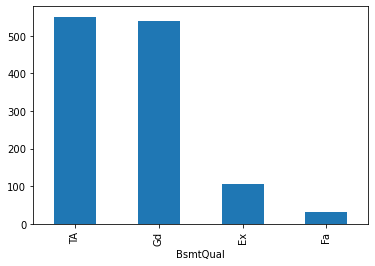

In [37]:
## By plotting 
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending = False).plot.bar()

In [39]:
### Now similarly checking for GarageType

df.groupby('GarageType')['GarageType'].count()

GarageType
2Types       6
Attchd     753
Basment     16
BuiltIn     76
CarPort      9
Detchd     328
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType'>

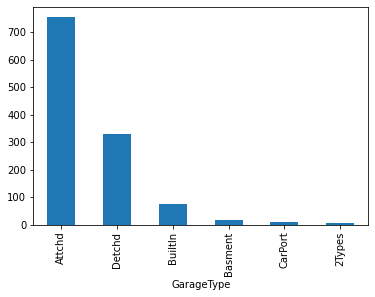

In [40]:
## By plotting 
df.groupby('GarageType')['GarageType'].count().sort_values(ascending = False).plot.bar()

## For FirePlace

<AxesSubplot:xlabel='FireplaceQu'>

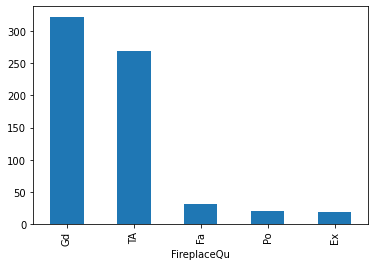

In [41]:
df.groupby('FireplaceQu')['FireplaceQu'].count().sort_values(ascending = False).plot.bar()

In [42]:
df['GarageType'].value_counts().index[0]

'Attchd'

# Replacing function

In [46]:
def impute_nan(df, variable):
    most_frequent = df[variable].value_counts().index[0]  # u can also use most_frequent = df[variable].mode()[0]
    df[variable].fillna(most_frequent, inplace = True)

In [47]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [48]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

## One of the major disadvantage here is, in FirePlaceQu it has got a lot of null values nearly 50%, so if we use this method it cause some major issue..like it cause a major distortion with the saleprice..

## Advantages
1 easy to implement

2 Faster way to implement

## Diadvantages
1 since we are using the more frequent labels, it may use them in an over represented way if there are many NAN's

2 It distorts the relation of the most frequent label.

# 2. Adding a variable to capture NAN

In [51]:
df = pd.read_csv('loan.csv' , usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [60]:
import numpy as np
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

## Here 'BsmtQual_Var' is the variable created to capture the importance of the missing value'

In [61]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [62]:
# now we replace the BsmtQual with the most frequent categories

frequent = df['BsmtQual'].mode()[0]

In [63]:
df['BsmtQual'].fillna(frequent, inplace = True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


## This method works well with FireplaceQu of having huge null values

In [77]:
import numpy as np
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [78]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Suppose if have more frequent categories, we just replace NAN with a new category

In [79]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [82]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [83]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [84]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [85]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [86]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Gd,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# This is the most used technique